In [19]:
from clit_recommender.util import flat_map, iterate_dirs
from clit_recommender import MD_ONLY


files = list(
    flat_map(
        lambda x: iterate_dirs(x, False), flat_map(iterate_dirs, iterate_dirs(MD_ONLY))
    )
)
x: str
names = set(map(lambda x: "/".join(x.split("/")[-2:]), files))


print(len(files))
print(len(names))
print(files[0])

19464
19464
/Users/niladi/workspace/seminar-kdd/data/2024-05-14/MDOnly/KORE_50_DBpedia.ttl/TextRazor/a7542e21d3d55116ca5c88cc0660f6347e54a74a244856ad7951ee5f5b15e984.json


In [1]:
from clit_recommender.config import Config
from clit_recommender.dataset import ClitRecommenderDataset

recommender = ClitRecommenderDataset(Config(batch_size=100))
texts = []
for i in recommender:
    for j in i:
        texts.append(j.context_text)

        # Calculate the text lengths

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


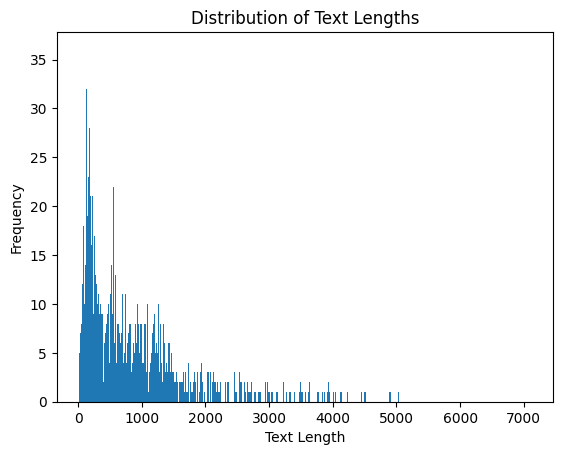

In [4]:
import matplotlib.pyplot as plt

text_lengths = [len(text) for text in texts]

# Create a histogram
plt.hist(text_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

Token indices sequence length is longer than the specified maximum sequence length for this model (583 > 512). Running this sequence through the model will result in indexing errors


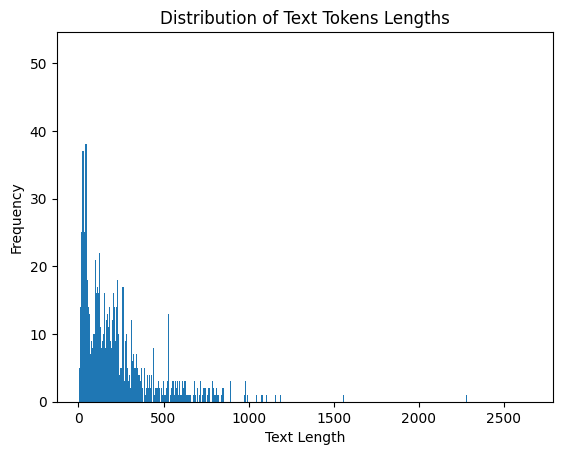

In [2]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

token_lengths = [len(tokenizer.tokenize(text)) for text in texts]

# Create a histogram
plt.hist(token_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Tokens Lengths")
plt.show()

In [4]:
test

['Foreign',
 'Ġplanes',
 'Ġto',
 'Ġland',
 'Ġin',
 'ĠChina',
 "Ġ'",
 's',
 'Ġpopular',
 'ĠGu',
 'il',
 'in',
 'Ġ.',
 'Ġ',
 'ĠBE',
 'IJ',
 'ING',
 'Ġ1996',
 '-',
 '12',
 '-',
 '06',
 'Ġ',
 'ĠChina',
 "Ġ'",
 's',
 'Ġtourist',
 'Ġspot',
 'Ġof',
 'ĠGu',
 'il',
 'in',
 'Ġin',
 'Ġthe',
 'Ġsouthern',
 'Ġregion',
 'Ġof',
 'ĠGuang',
 'xi',
 'Ġwill',
 'Ġopen',
 'Ġits',
 'Ġairport',
 'Ġto',
 'Ġforeign',
 'Ġaircraft',
 'Ġ,',
 'Ġthe',
 'ĠXin',
 'hua',
 'Ġnews',
 'Ġagency',
 'Ġsaid',
 'Ġon',
 'ĠFriday',
 'Ġ.',
 'Ġ',
 'ĠAn',
 'Ġassessment',
 'Ġgroup',
 'Ġmade',
 'Ġup',
 'Ġof',
 'Ġthe',
 'ĠState',
 'ĠCouncil',
 "Ġ'",
 's',
 'ĠPort',
 'ĠOffice',
 'Ġ,',
 'Ġthe',
 'ĠCivil',
 'ĠAviation',
 'ĠAdministration',
 'Ġof',
 'ĠChina',
 'Ġ,',
 'Ġthe',
 'ĠGeneral',
 'ĠAdministration',
 'Ġof',
 'ĠCustoms',
 'Ġand',
 'Ġother',
 'Ġauthorities',
 'Ġhad',
 'Ġgranted',
 'Ġthe',
 'Ġairport',
 'Ġpermission',
 'Ġto',
 'Ġhandle',
 'Ġforeign',
 'Ġaircraft',
 'Ġ,',
 'ĠXin',
 'hua',
 'Ġsaid',
 'Ġ.',
 'Ġ',
 'Ġ"',
 'ĠThe',
 'Ġmov

## Best Graphs Evaluation

In [1]:
import sys

print(sys.path)

['/local/users/uduui/.localpython/lib/python39.zip', '/local/users/uduui/.localpython/lib/python3.9', '/local/users/uduui/.localpython/lib/python3.9/lib-dynload', '', '/local/users/uduui/.localpython/venv/clit_recommender/lib/python3.9/site-packages', '/local/users/uduui/clit_recommender/src']


In [1]:
from clit_recommender.best_graphs import generate_tensors

tensors = generate_tensors(30)

KeyboardInterrupt: 

In [3]:
from clit_recommender.best_graphs import BEST_GRAPHS_JSON_FILE, BEST_GRAPHS_LMDB_FILE
from clit_recommender.lmdb_wrapper import LmdbImmutableDict
from clit_recommender.config import Config
from clit_recommender.dataset import ClitRecommenderDataset
from os.path import join
from tqdm.auto import tqdm
import json
from collections import Counter

config = Config()
# Load the best graphs JSON
with open(join(config.cache_dir, BEST_GRAPHS_JSON_FILE), "r") as f:
    best_graphs = json.load(f)

graphs = []

for key, value in best_graphs.items():
    if value is None:
        print("NONE ")
        continue
    for v in value:
        graphs.append(tuple(map(tuple, v)))

element_counts = Counter(graphs)
for key, value in element_counts.items():
    print(value, sum(map(sum, key)), key)

257 1.0 ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 0.0))
257 1.0 ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 0.0))
257 1.0 ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 0.0))
426 2.0 ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.0))
426 2.0 ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.0, 1.0))
274 2.0 ((0.0, 1.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 